In [42]:
# importing libraries and data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
from scipy import spatial

In [29]:
housing_df = pd.read_csv('housing_dataset.csv')

The distances of the farthest and nearest housing blocks from the house block described in the first row of the dataset.

In [30]:
array = np.array([housing_df['longitude'].iloc[0],housing_df['latitude'].iloc[0]])

distance = []
for row in housing_df.itertuples():
    row_arr = np.array([row.longitude,row.latitude])
    dist = spatial.distance.euclidean(array,row_arr)
    distance.append(dist)
distance.sort()

print("The farthest distance from first housing block is",(round(distance[-1],2)))
print("The nearest distance from first housing block is",(round(distance[1],2)))

The farthest distance from first housing block is 9.21
The nearest distance from first housing block is 0.01


In [31]:
# average age of the house blocks near the ocean

housing_df = pd.read_csv("housing_dataset.csv")
Near_ocean = housing_df[housing_df["ocean_proximity"] == 'NEAR OCEAN']
print("The Average age of the house blocks near ocean is", Near_ocean['housing_age'].mean())

The Average age of the house blocks near ocean is 29.347253574115875


In [32]:
# income of the housing block with the most and least population density (per family).

density = housing_df["population"]/housing_df["families"]
housing_df['Population Density'] = density 

min_density = housing_df['Population Density'].min()
max_density = housing_df['Population Density'].max()

Min_Income = housing_df[housing_df["Population Density"] == min_density]["average_income"].item()
Max_Income = housing_df[housing_df["Population Density"] == max_density]["average_income"].item()

print("The minimum housing income is",(Min_Income))
print("The maximum housing income is",(Max_Income))

The minimum housing income is 2.5893
The maximum housing income is 10.2264


In [33]:
# price difference between the latest and oldest housing block from the dataset.
latest_house_age = housing_df["housing_age"].min()
oldest_house_age = housing_df["housing_age"].max()

Min_hou_age = housing_df[housing_df['housing_age'] == latest_house_age]['house_value'].mean()
Max_hou_age = housing_df[housing_df['housing_age'] == oldest_house_age]['house_value'].mean()
Price_Diff = Max_hou_age - Min_hou_age

print("The price difference between latest and oldest housing block is",(Price_Diff))

The price difference between latest and oldest housing block is 131120.87117046345


In [34]:
# cheapest price per room from the dataset.
housing_df['Price Per Room'] = housing_df['house_value']/housing_df['total_rooms']

print("The cheapest price per room is",housing_df['Price Per Room'].min())

The cheapest price per room is 1.595444807757357


In [35]:
# population density (per family) for the most and least wealthy housing blocks in the dataset.

Least_Wealthy = housing_df['average_income'].min()
Most_Wealthy = housing_df['average_income'].max()

pop_den_LW = housing_df[housing_df['average_income'] == Least_Wealthy]['Population Density'].mean()
pop_den_MW = housing_df[housing_df['average_income'] == Most_Wealthy]['Population Density'].mean()
print("The population density of least wealthy housing blocks is",(pop_den_LW))
print("The population density of most wealthy housing blocks is",(pop_den_MW))

The population density of least wealthy housing blocks is 3.4754772079772085
The population density of most wealthy housing blocks is 3.307545896889619


In [36]:
#  the total housing blocks located in the same place.

pd.DataFrame(housing_df.groupby(['longitude','latitude']).size())

0
longitude latitude   
-124.35   40.54     1
-124.30   41.80     1
          41.84     1
-124.27   40.69     1
-124.26   40.58     1
...                ..
-114.56   33.69     1
-114.55   32.80     1
-114.49   33.97     1
-114.47   34.40     1
-114.31   34.19     1

[12590 rows x 1 columns]

In [37]:
# price of expensive room grouped by ocean proximity.
pd.DataFrame(housing_df.groupby("ocean_proximity")["Price Per Room"].max())

,Price Per Room
ocean_proximity,
<1H OCEAN,22500.000000
INLAND,68750.000000
ISLAND,451.807229
NEAR BAY,62500.125000
NEAR OCEAN,23333.333333


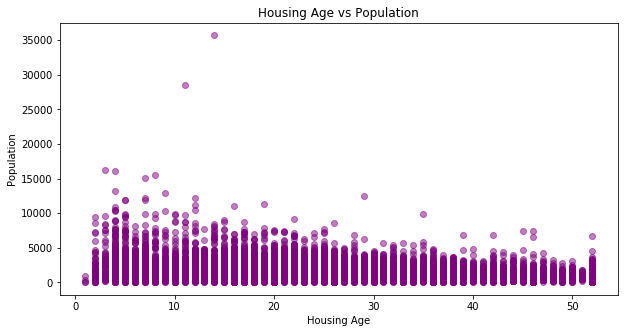

In [38]:
# population scatter plot against housing age and another against ocean proximity.

import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(housing_df['housing_age'], housing_df['population'] ,
                   
                   alpha=0.5,
                   facecolor='purple',
                   edgecolor='face'
                   )
ax.set_title('Housing Age vs Population')
ax.set_xlabel('Housing Age')
ax.set_ylabel('Population')
ax

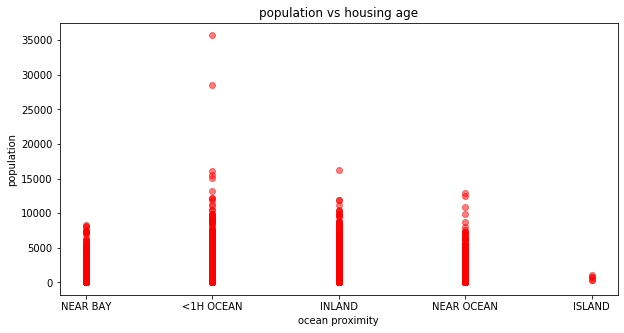

In [39]:
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(housing_df['ocean_proximity'], housing_df['population'] ,
                   
                   alpha=0.5,
                   facecolor='red',
                   edgecolor='face'
                   )
ax.set_title('population vs housing age')
ax.set_xlabel('ocean proximity')
ax.set_ylabel('population')
ax

Text(0.5, 1.0, 'bar')

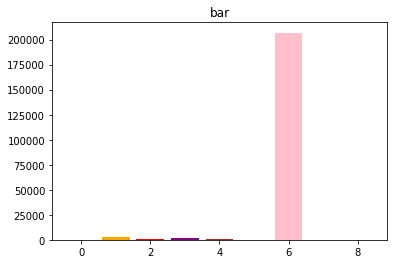

In [40]:
# bar diagram of average values of all suitable columns.

fig2, bx = plt.subplots()
freq = [housing_df['housing_age'].mean(),
        housing_df['total_rooms'].mean(),
        housing_df['total_bedrooms'].mean(),
      housing_df['population'].mean(),
     housing_df['families'].mean(),
    housing_df['average_income'].mean(),
       housing_df['house_value'].mean(),
       housing_df['Population Density'].mean(),
       housing_df['Price Per Room'].mean()]
xps = np.arange(len(freq))

color = ['yellow','orange','red','purple','brown','black','pink','brown','olive']
bx.bar(xps,freq, align="center",color=color)
bx.set_title('bar')

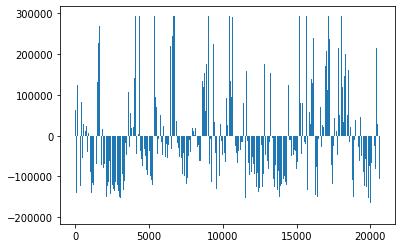

In [43]:
#  differences in housing prices from the average price of housing using a bar diagram.
avg_price = housing_df['house_value'].mean()
price_diff = []
y_label= []
for i in range(len(housing_df)):
    y_label.append(i)
    price_diff.append(housing_df['house_value'][i]- avg_price)
    
plt.bar(y_label,price_diff)
plt.show()